# Notebook for Plotting Execution Times

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('./execution_times.csv')

## plots

[0.04120871, 0.043115514, 0.07223753, 0.123306474]
[0.000893927, 0.001640749, 0.009106421, 0.348036981]
[0.00066061, 0.004743505, 0.016551685, 0.385227513]
[1, 10, 100, 1000]


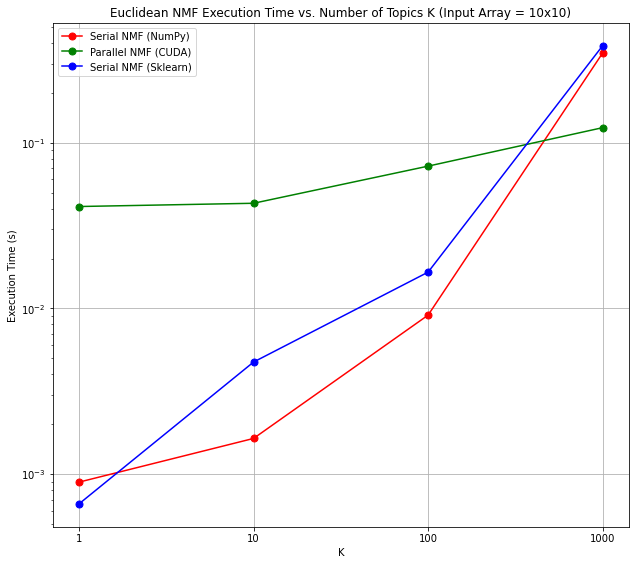

In [49]:
parallel = []
serial = []
sklearn = []

ks = []

for index, row in df.iterrows():
    function_name = row['Function'].strip()
    execution_time = row['Execution Time']
    K = row[' K']
    X_shape = row[' X_shape']
    loss = row[' Loss Type'].strip()
    
    if X_shape == 10:
        if loss == 'euclidean':
            if function_name == 'NMF_parallel':
                parallel.append(execution_time)
            elif function_name == 'NMF_serial':
                serial.append(execution_time)
            elif function_name == 'NMF_sklearn':
                sklearn.append(execution_time)
            else:
                raise Exception('Bad function name.')
            
            if K not in ks:
                ks.append(K)
                
print(parallel)
print(serial)
print(sklearn)
print(ks)

title = "Euclidean NMF Execution Time vs. Number of Topics K (Input Array = 10x10)"

fig = plt.figure(figsize=(8, 7)) # make plot
axis = fig.add_axes([0,0,1,1])
axis.set_yscale('log')
marker_size = 7

axis.plot(serial, color='red', marker='o', ms=marker_size)
axis.plot(parallel, color='green', marker='o', ms=marker_size)
axis.plot(sklearn, color='blue', marker='o', ms=marker_size)

axis.set_ylabel("Execution Time (s)")
axis.set_xlabel("K")

plt.xticks([int(i) for i in range(len(ks))], ks)

axis.set_title(title)
axis.grid()

axis.legend(['Serial NMF (NumPy)', 'Parallel NMF (CUDA)', 'Serial NMF (Sklearn)'])

extent = axis.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("./figures/{}.png".format(title), bbox_inches=extent.expanded(1.2, 1.2))

plt.show()

## compare euclidean + divergence

[0.016551685, 0.04907403, 0.212441254, 0.474214959, 0.554666519, 10.92336755]
[0.009349155, 0.141110516, 0.209632635, 0.782243562, 1.47795918, 48.1401614]
[10, 50, 100, 500, 1000, 5000]


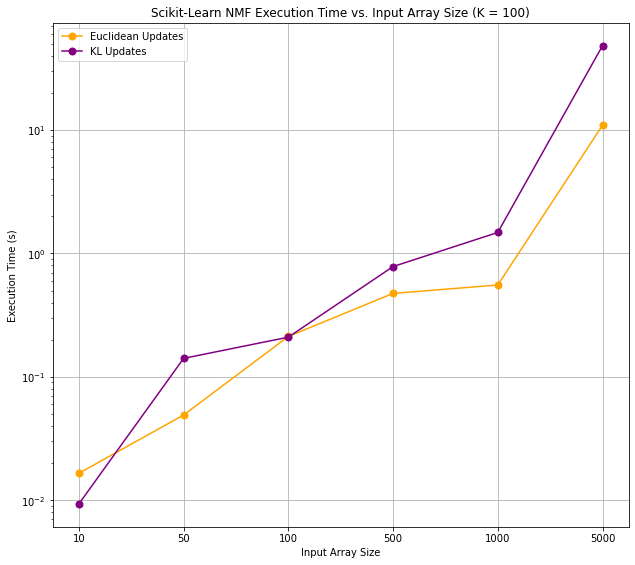

In [8]:
euclidean = []
divergence = []

input_shapes = []

for index, row in df.iterrows():
    function_name = row['Function'].strip()
    execution_time = row['Execution Time']
    K = row[' K']
    X_shape = row[' X_shape']
    loss = row[' Loss Type'].strip()
    
    if K == 100:
        if function_name == 'NMF_sklearn':
            if loss == 'euclidean':
                euclidean.append(execution_time)
            elif loss == 'divergence':
                divergence.append(execution_time)
            else:
                raise Exception('loss issue.')
            
            if X_shape not in input_shapes:
                input_shapes.append(X_shape)
                
                
print(euclidean)
print(divergence)
# print(sklearn)
print(input_shapes)

title = "Scikit-Learn NMF Execution Time vs. Input Array Size (K = 100)"

fig = plt.figure(figsize=(8, 7)) # make plot
axis = fig.add_axes([0,0,1,1])
axis.set_yscale('log')
marker_size = 7

axis.plot(euclidean, color='orange', marker='o', ms=marker_size)
axis.plot(divergence, color='purple', marker='o', ms=marker_size)
# axis.plot(sklearn, color='blue', marker='o', ms=marker_size)

axis.set_ylabel("Execution Time (s)")
axis.set_xlabel("Input Array Size")

plt.xticks([int(i) for i in range(len(input_shapes))], input_shapes)

axis.set_title(title)
axis.grid()

axis.legend(['Euclidean Updates', 'KL Updates'])

extent = axis.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("./figures/{}.png".format(title), bbox_inches=extent.expanded(1.2, 1.2))

plt.show()